In [20]:
# Clone the YOLOV5 repo and install dependencies

!git clone https://github.com/ultralytics/yolov5

%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17544, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 17544 (delta 25), reused 3 (delta 3), pack-reused 17502 (from 2)
Receiving objects: 100% (17544/17544), 16.61 MiB | 25.42 MiB/s, done.
Resolving deltas: 100% (12019/12019), done.
/content/yolov5/yolov5/yolov5


In [21]:
import torch
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import numpy as np

In [22]:
# Load YOLOv5s model (you can also try 'yolov5m', 'yolov51', 'yolov5x')
model=torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


YOLOv5 🚀 2025-8-20 Python-3.12.11 torch-2.8.0+cu126 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 126MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [23]:
from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  image_path = fn
  print(f"Uploaded {fn}")

Saving cat.jpg to cat.jpg
Uploaded cat.jpg


In [24]:
# Run inference
results = model(image_path)
# Show results in text
results.print()
# Filter only cats and dogs
df = results.pandas().xyxy[0]
pets_df = df[df['class'].isin([16, 17])] #16: cat, 17: dog
print(pets_df)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1670x1670 1 cat
Speed: 58.6ms pre-process, 480.1ms inference, 4.3ms NMS per image at shape (1, 3, 640, 640)


Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []


In [25]:
# Display image with bounding boxes
# results.render() # updates results.imgs with boxes # This is deprecated and does not update results.im
rendered_images = results.render() # render() now returns the images with bounding boxes
# Convert and show using PIL
for img in rendered_images: # loop through the rendered images and display them.
    img_base = Image.fromarray(img)
    display(img_base)

Output hidden; open in https://colab.research.google.com to view.

In [35]:
# Upload a video file
uploaded_video=files.upload()
video_path = list(uploaded_video.keys())[0]
# Open video
cap = cv2.VideoCapture (video_path)
while cap.isOpened():
  ret, frame =cap.read()
  if not ret:
    break
  results =model(frame)
  annotated_frame = results.render()[0]
# Convert BGR to RGB for displaying in Colab
  rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb)
  plt.axis('off')
  plt.show()
# Show only a few frames
  break # Remove this break to play full video detection
cap.release()

Saving vedio.mp4 to vedio.mp4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


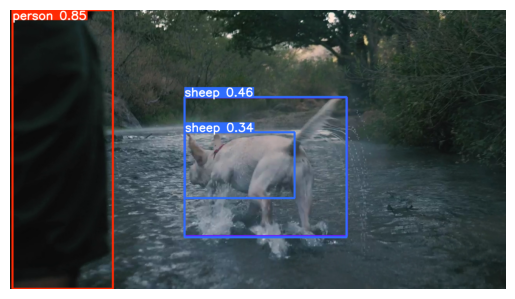

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

In [36]:
# Detect and display pets from every frame
from IPython.display import display, clear_output
cap = cv2.VideoCapture(video_path)

frame_count = 0
max_frames= 30 # You can increase this to analyze more frames
while cap.isOpened() and frame_count < max_frames:
  ret, frame=cap.read()
  if not ret:
    break
  results =model (frame)
  df =results.pandas().xyxy [0]
#Only display if cats or dogs are detected 16
  if not df[df['class'].isin([16, 17])].empty:
    results.render()
    rgb = cv2.cvtColor(results.ims[0], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.axis('off')
    clear_output (wait=True)
    display(plt.gcf())
  frame_count += 1
cap.release()